In [74]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
REWARDS = np.array([
    [0, 100],
    [100, 500],
    [500, 1000],
    [1000, 5000],
    [5000, 10000],
    [10000, 50000],
    [50000, 100000],
    [100000, 500000],
    [500000, 1000000],
    [1000000, 5000000]
])
PROBABILITIES = np.array([
    0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1
])
REWARDS, PROBABILITIES

(array([[      0,     100],
        [    100,     500],
        [    500,    1000],
        [   1000,    5000],
        [   5000,   10000],
        [  10000,   50000],
        [  50000,  100000],
        [ 100000,  500000],
        [ 500000, 1000000],
        [1000000, 5000000]]),
 array([0.99, 0.9 , 0.8 , 0.7 , 0.6 , 0.5 , 0.4 , 0.3 , 0.2 , 0.1 ]))

In [76]:
class ACTION(Enum):
    PLAY = 0
    QUIT = 1

In [77]:
class Game:
    def __init__(self):
        self.round = 0
        self.reward = 0
        self.finished = False

    def play_move(self, action):
        if action == ACTION.QUIT:
            self.finished = True
        elif action == ACTION.PLAY:
            if np.random.random() < PROBABILITIES[self.round]:
                self.reward += REWARDS[self.round][1]
            else:
                self.reward -= REWARDS[self.round][0]
                self.finished = True

            self.round += 1
            if self.round == 10:
                self.finished = True

In [78]:
game = Game()

In [97]:
def simulate_game():
    game = Game()
    while not game.finished:
        game.play_move(ACTION.PLAY)
    return game.reward, game.round

In [100]:
def monte_carlo_simulation(n):
    rewards = np.zeros(n)
    rounds = np.zeros(n)
    for i in range(n):
        rewards[i], rounds[i] = simulate_game()

    bins = np.arange(0, 10, 1)
    plt.hist(rounds, bins=bins)
    return np.mean(rounds), np.std(rounds), np.min(rounds), np.max(rounds), np.median(rounds)

(4.61546, 1.742822133322847, 1.0, 10.0, 4.0)

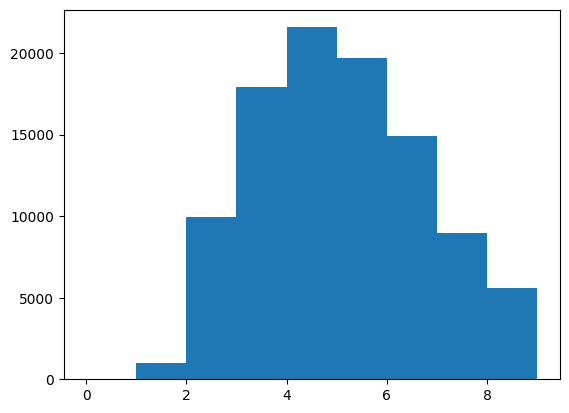

In [101]:
monte_carlo_simulation(100000)